https://www.yellowpages.com.au/search/listings?clue=Safety+Supplies&eventType=pagination&pageNumber=
b'\n<!DOCTYPE html>\n<html lang="en" class="no-js">\n<head>\n    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no"/>\n    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"/>\n    \n        <title>Yellow Pages&reg; | Data Protection</title>\n    \n    <link rel="shortcut icon" href="/favicon.ico?v=2" />\n\n    <!--[if (lt IE 9)&!(IEMobile)]><script src="/assets/ie/respond.sensis-9575467dfbc008e5b0d486dc4f481624.js" type="text/javascript" ></script><![endif]-->\n    <!--[if (lt IE 10)&!(IEMobile)]><script src="/assets/ie/custom-event-ie9.js" type="text/javascript" ></script><![endif]-->\n    <!--[if (lt IE 10)&!(IEMobile)]><link rel="stylesheet" href="/assets/ie/gradient-hacks-ie89-12453d23f1fec3d9d46e56cc6e023576.css"/><![endif]-->\n    \n        <script src="
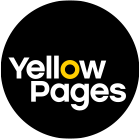

In [9]:
import requests
import lxml
from lxml import html
import pandas as pd
import numpy as np
from ast import literal_eval



# """____dictionary for data and xpath____"""
d_xpath = {
    "div" : "//*[@class='search-contact-card call-to-actions-4 feedback-feature-on']",
    "company name" : "//*[@class='listing-name']/text()",
    "Type & address" : "//*[@class='listing-heading']/text()",
    "desc" : "//*[@class='listing-short-description']/text()",
    "Phone" : "//*[@title = 'Phone' ]/@href",
    "url" : "//*[@class= 'contact contact-main contact-url ' ]/@href"
}


# """ ____read url from csv____"""
# list_url = pd.read_csv("files/url.csv")
list_url = ['https://www.yellowpages.com.au/search/listings?clue=Safety+Supplies&eventType=pagination&pageNumber=']

# ____request for url____
def scrap_url(list_of_url, dict_of_xpath):
    session_requests = requests.session()
    new = {}
    v_list = []
    for url in list_of_url:
        try:
            print(url)
            conv_list = []
            result = session_requests.get(url)
            print(result.content)
            tree = html.fromstring(result.content)
            new['url'] = url
            print(new['url'])
            for key in [*dict_of_xpath]:
                data = list(set(tree.xpath(dict_of_xpath[key])))
                new[key] = data
                print(data)

            for key in [*new]:
                conv_list.append(new[key])

            v_list.append(conv_list)
            
        except:
            print(url)
            for key in [*dict_of_xpath]:
                data = "error scrapping data"
                
            for key in [*new]:
                conv_list.append(new[key])

            v_list.append(conv_list)
        
    scrap_df = pd.DataFrame(v_list, columns=[*new])
    return scrap_df


# """____to create variation from option list____"""
def rec_if_clist(currentcol,totalcol,dataframe):
    if currentcol == totalcol:
        return dataframe
    
    else:
        col = currentcol
        cols = [*dataframe.columns]
        all_df = pd.DataFrame(columns=[*dataframe.columns])
        for d_index in range(len([*dataframe.index])):
            ref_row = dataframe.iloc[d_index]
            data1 = ref_row[col]
            if str(type(data1)) == "<class 'list'>":
                for d in range(len(data1)):
                    n_dic = {}
                    for r_data in range(len([*ref_row.values])):
                        if r_data == col:
                            n_dic[cols[r_data]] = data1[d]

                        else:
                            n_dic[cols[r_data]] = ref_row.iloc[r_data]

                    add_df = pd.DataFrame([n_dic], columns=[*dataframe.columns]) 
                    all_df = all_df.append(add_df, ignore_index = True)

            else:
                all_df = all_df.append(ref_row, ignore_index = True)
        print("calling Recurssion {}".format(currentcol))

        return rec_if_clist(currentcol+1,totalcol,all_df)

data = scrap_url(list_url,d_xpath)    
# data = pd.read_csv("research_keyword.csv", sep='\t', dtype=object, encoding='utf-8')
# new_data = rec_if_clist(0,len(data.columns),data)

# data.to_csv("result/general_output.csv", sep="\t", encoding="utf-8")  #____basic output without variation
# new_data.to_csv("result/output_with_variation.csv", sep="\t", encoding="utf-8") #____output with variation


In [4]:
data

,url,div,company name,Type & address,desc,Phone
0,[],[],[],[],[],[]
